# Monday, October 21st, 2024

From last week's notebook:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vertical_stripes = np.zeros((85,85,3))  # 85x85 image with 3 layers for R,G,B

vertical_stripes[:,0:20] = (1, .7, .7)
vertical_stripes[:,20:55] = (0,.2,.9)
vertical_stripes[:,55:67] = (1,1,0)
vertical_stripes[:,67:85] = (.2,1,.2)

# Reminder: We should figure out how to accomplish this in an automated way...

In [3]:
horizontal_stripes = np.transpose(vertical_stripes,[1,0,2])

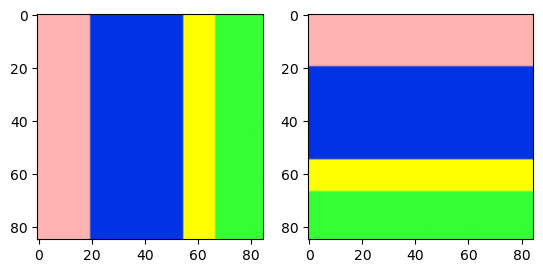

In [7]:
fig = plt.figure()

plt.subplot(1,2,1)
plt.imshow(vertical_stripes)

plt.subplot(1,2,2)
plt.imshow(horizontal_stripes)

**Exercise:** Using these horizontal and vertical stripe arrays, generate the simple checkerboard tartan pattern.

To start, let's generate a blank array that has the same shape as `vertical_stripes`:

In [8]:
checkerboard_tartan = np.zeros(vertical_stripes.shape)

We can now loop through the rows and columns of `checkerboard_tartan` and decide whether to take the color value from `vertical_stripes` or `horizontal_stripes`.

In [25]:
for i in range(checkerboard_tartan.shape[0]):
    for j in range(checkerboard_tartan.shape[1]):
        if i % 2 == 0:
            if j % 2 == 0:
                checkerboard_tartan[i,j] = vertical_stripes[i,j]
            else:
                checkerboard_tartan[i,j] = horizontal_stripes[i,j]
        else:
            if j % 2 == 0:
                checkerboard_tartan[i,j] = horizontal_stripes[i,j]
            else:
                checkerboard_tartan[i,j] = vertical_stripes[i,j]

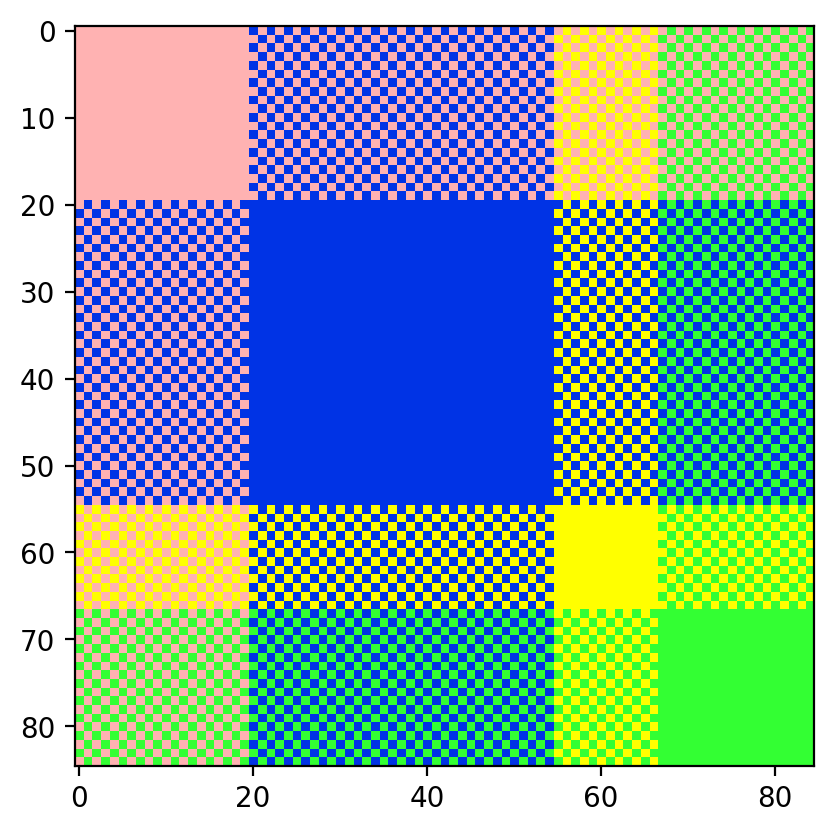

In [26]:
plt.imshow(checkerboard_tartan)

Essentially, we want to select a vertical pixel if: the row is even and the column is even or if the row is odd and the column is odd.

We want to select a horizontal pixel if: the row is even and the column is odd or if the row is odd and the column is even.

We can perform this check by checking whether `(i+j) % 2` is even or odd.

In [27]:
for i in range(checkerboard_tartan.shape[0]):
    for j in range(checkerboard_tartan.shape[1]):
        if (i + j) % 2 == 0:
            checkerboard_tartan[i,j] = vertical_stripes[i,j]
        else:
            checkerboard_tartan[i,j] = horizontal_stripes[i,j]

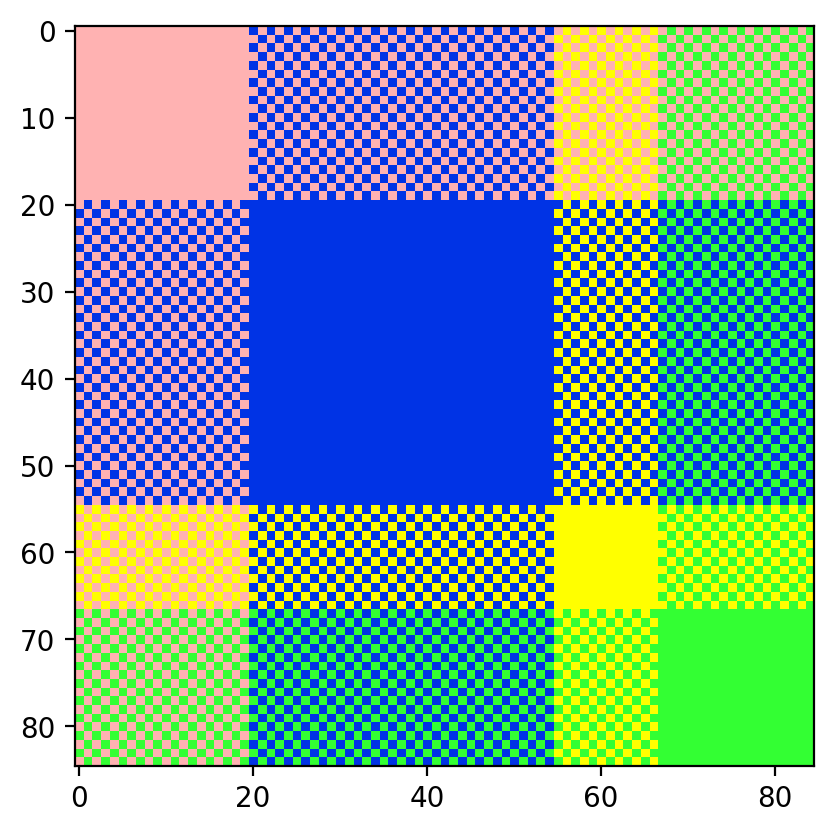

In [28]:
plt.imshow(checkerboard_tartan)

**Exercise:** Adapt the code above to generate the more realistic tartan pattern depicted in the project page.

## Boolean arrays

In [31]:
a = np.linspace(0,10,1001)

We can evaluate Boolean expressions that involve NumPy arrays:

In [33]:
a > 2

array([False, False, False, ...,  True,  True,  True])

The result is an array filled with `True`/`False`. We can use these Boolean arrays to take slices of other arrays:

In [34]:
a[a>2]

array([ 2.01,  2.02,  2.03,  2.04,  2.05,  2.06,  2.07,  2.08,  2.09,
        2.1 ,  2.11,  2.12,  2.13,  2.14,  2.15,  2.16,  2.17,  2.18,
        2.19,  2.2 ,  2.21,  2.22,  2.23,  2.24,  2.25,  2.26,  2.27,
        2.28,  2.29,  2.3 ,  2.31,  2.32,  2.33,  2.34,  2.35,  2.36,
        2.37,  2.38,  2.39,  2.4 ,  2.41,  2.42,  2.43,  2.44,  2.45,
        2.46,  2.47,  2.48,  2.49,  2.5 ,  2.51,  2.52,  2.53,  2.54,
        2.55,  2.56,  2.57,  2.58,  2.59,  2.6 ,  2.61,  2.62,  2.63,
        2.64,  2.65,  2.66,  2.67,  2.68,  2.69,  2.7 ,  2.71,  2.72,
        2.73,  2.74,  2.75,  2.76,  2.77,  2.78,  2.79,  2.8 ,  2.81,
        2.82,  2.83,  2.84,  2.85,  2.86,  2.87,  2.88,  2.89,  2.9 ,
        2.91,  2.92,  2.93,  2.94,  2.95,  2.96,  2.97,  2.98,  2.99,
        3.  ,  3.01,  3.02,  3.03,  3.04,  3.05,  3.06,  3.07,  3.08,
        3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,  3.17,
        3.18,  3.19,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.28,

Coming back to our checkboard pattern:

Let's generate an array in a checkerboar pattern. That is, start with `True` in the `[0,0]` position, and alternate between `True` and `False` every time we move through a row or column:

In [40]:
boolean_array = np.zeros((vertical_stripes.shape[0], vertical_stripes.shape[1]), dtype=bool)

for i in range(boolean_array.shape[0]):
    for j in range(boolean_array.shape[1]):
        if (i + j) % 2 == 0:
            boolean_array[i,j] = True

We can then use this Boolean array to generate our checkerboard tartan:

In [43]:
checkerboard_tartan = np.zeros(vertical_stripes.shape)

checkerboard_tartan[boolean_array] = vertical_stripes[boolean_array]

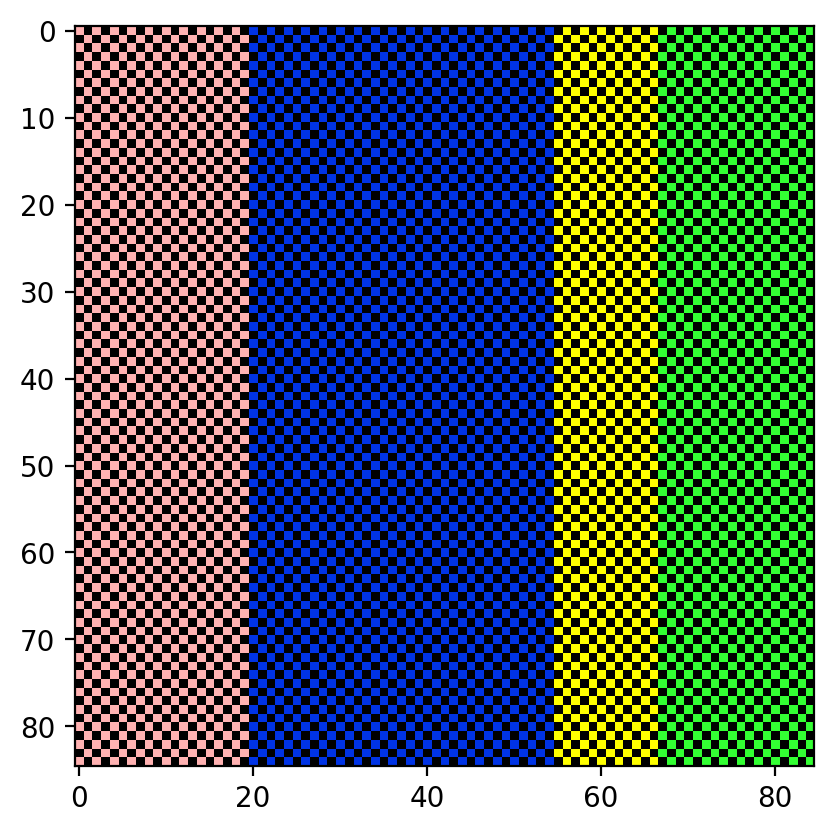

In [45]:
plt.imshow(checkerboard_tartan)

We can invert a Boolean NumPy array using `~`:

In [47]:
~boolean_array

array([[False,  True, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True],
       [False,  True, False, ..., False,  True, False],
       ...,
       [False,  True, False, ..., False,  True, False],
       [ True, False,  True, ...,  True, False,  True],
       [False,  True, False, ..., False,  True, False]])

In [48]:
checkerboard_tartan = np.zeros(vertical_stripes.shape)

checkerboard_tartan[boolean_array] = vertical_stripes[boolean_array]
checkerboard_tartan[~boolean_array] = horizontal_stripes[~boolean_array]

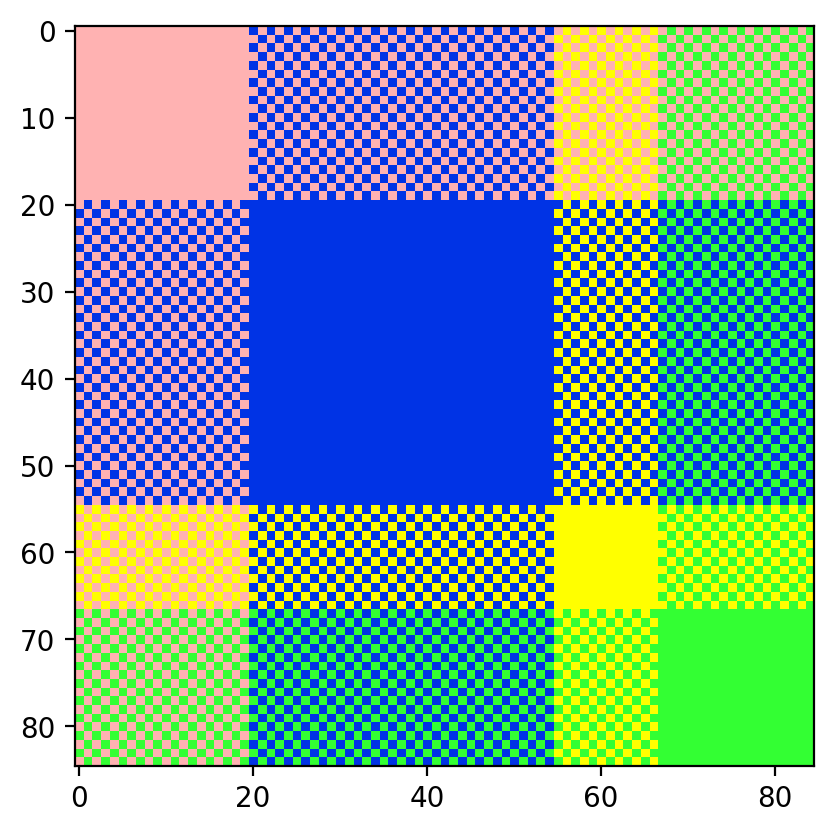

In [49]:
plt.imshow(checkerboard_tartan)

Note:

In [50]:
my_array = np.array([[1,2,3,4],
                     [5,6,7,8],
                     [9,10,11,12]])

In [55]:
my_mask = (my_array % 2 == 0)
my_mask

array([[False,  True, False,  True],
       [False,  True, False,  True],
       [False,  True, False,  True]])

In [56]:
my_array[my_mask]

array([ 2,  4,  6,  8, 10, 12])

When applying a Boolean array as a slice (or sometimes called a "mask"), we get always get a 1-dimensional array in return. 

## String processing

For our tartan project, we are assigned a sequence of color-width values that generate the tartan. It would be useful if we could have Python parse this sequence instead of us doing it manually.

In [59]:
sequence_string = 'B14 K6 B6 K6 B6 K32 OG32 K6 OG32 K32 B32 K6 B6 K6 B32 K32 OG32 K6 OG32 K32 B6 K6 B6 K6 B28'

We can use the `.split()` method to separate a string into a list of substrings that were separated by spaces.

In [60]:
sequence = sequence_string.split()

In [62]:
sequence[:5]

['B14', 'K6', 'B6', 'K6', 'B6']

Can we iterate through these substrings and identify the desired color and width?

For now, let's look at just the first substring:

In [63]:
color_width_string = sequence[0]
print(color_width_string)

B14


In [67]:
color_char = color_width_string[0]
width = int(color_width_string[1:])

In [70]:
for color_width_string in sequence:
    color_char = color_width_string[0]
    width = int(color_width_string[1:])
    
    print(color_char, width)

B 14
K 6
B 6
K 6
B 6
K 32


ValueError: invalid literal for int() with base 10: 'G32'

Problem: the code above only works if our color labels are only 1 character long. Otherwise, any additional characters are being lumped in with the width string, which can't be converted to an integer.

There are some other helpful string methods that could resolve this issue:

For example, `.isnumeric` will check whether a string contains only number data.
Also, `.isalpha` will check whether a string contains only letter data.

In [74]:
'12345'.isnumeric()

True

In [75]:
'B14'.isnumeric()

False

In [76]:
'12345'.isalpha()

False

In [77]:
'B14'.isalpha()

False

In [78]:
'BOG'.isalpha()

True

In [80]:
my_str = 'Hello my name is Jon, I am 35 years old and was born in 1989.'

In [82]:
[char for char in my_str if char.isalpha()]

['H',
 'e',
 'l',
 'l',
 'o',
 'm',
 'y',
 'n',
 'a',
 'm',
 'e',
 'i',
 's',
 'J',
 'o',
 'n',
 'I',
 'a',
 'm',
 'y',
 'e',
 'a',
 'r',
 's',
 'o',
 'l',
 'd',
 'a',
 'n',
 'd',
 'w',
 'a',
 's',
 'b',
 'o',
 'r',
 'n',
 'i',
 'n']

In [86]:
my_numbers = [char for char in my_str if char.isnumeric()]
my_numbers

['3', '5', '1', '9', '8', '9']

We can use the `.join()` method to connect a list of strings on a given as string as a separator.

In [87]:
'-'.join(my_numbers)

'3-5-1-9-8-9'

In [ ]:
def parse_pattern_str(pattern_str):
    ...
    ...
    return width_RGBs

In [ ]:
def get_stripes(width_RGBs):
    vertical_stripes = ...
    horizontal_stripes = np.transpose(vertical_stripes,[1,0,2])
    
    return vertical_stripes, horizontal_stripes

In [ ]:
width_RGBs = parse_pattern_str(pattern_str)
vertical_stripes, horizontal_stripes(width_RGBs)
tartan_pattern = get_tartan_pattern(vertical_stripes, horizontal_stripes)

# Wednesday, October 23rd, 2024

## Working with images in Python

We can use the function `plt.imread()` from `matplotlib` to load an image file into an array:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
motorbike = plt.imread('motorbike.png')

In [4]:
motorbike.shape

(552, 640, 3)

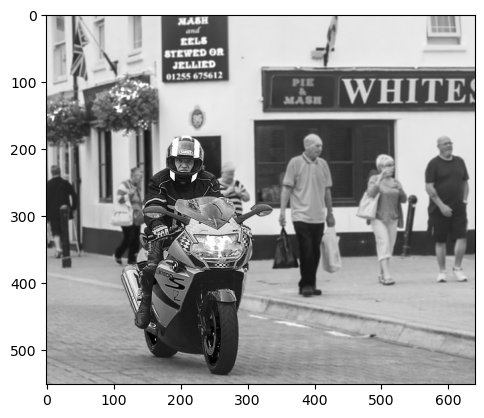

In [5]:
plt.imshow(motorbike)

We can modify the `motorbike` array and see what effects this has on the resulting image:

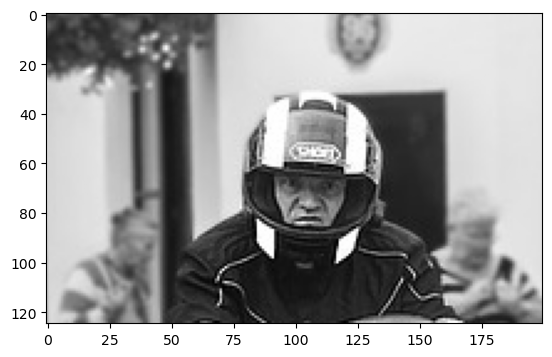

In [6]:
face = motorbike[150:275, 100:300]
plt.imshow(face)

Let's set all blue channel information within the `face` slice to be `0`:

In [7]:
face[:,:,2] = 0

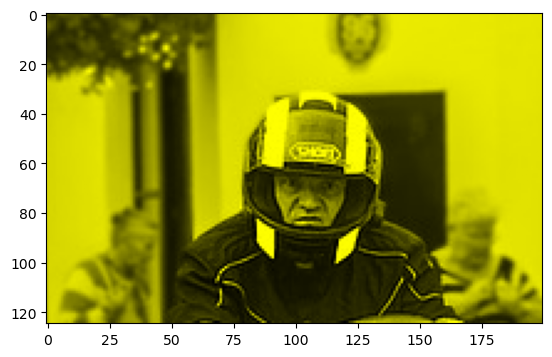

In [8]:
plt.imshow(face)

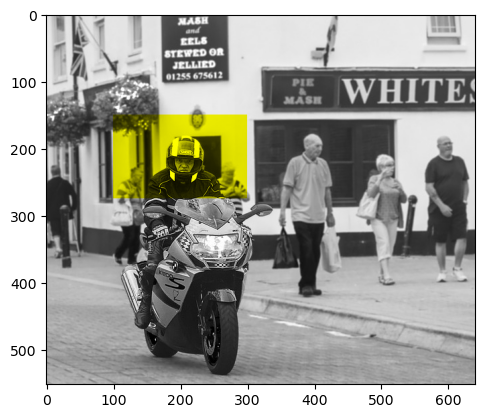

In [9]:
plt.imshow(motorbike)

Let's highlight another person in red:

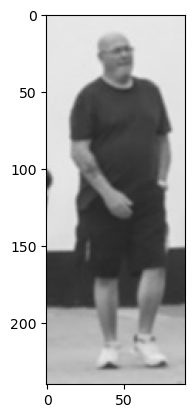

In [10]:
man = motorbike[170:410, 550:]

plt.imshow(man)

We can remove the blue and green information to be left with red:

In [11]:
man[:,:,1] = 0
man[:,:,2] = 0

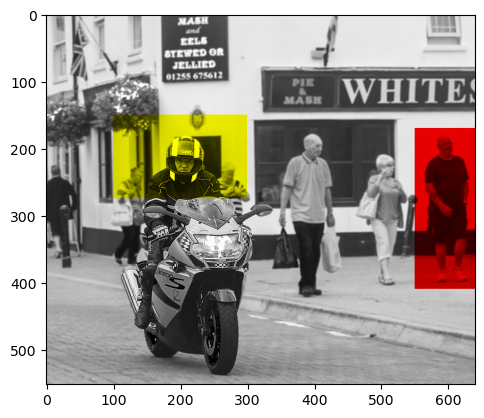

In [12]:
plt.imshow(motorbike)

## Image processing project:

We want to work with grayscale images for this project, not RGB images. In other words, we want to work with 2D arrays that contain a single grayscale value.

One way to convert: take just the red-channel value as the grayscale value:

In [13]:
red = motorbike[:,:,0]
green = motorbike[:,:,1]
blue = motorbike[:,:,2]

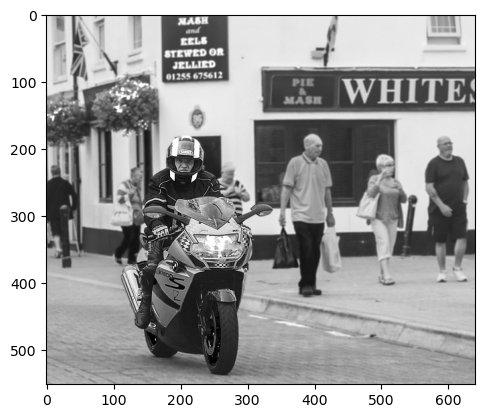

In [14]:
plt.imshow(red, cmap='gray')

Instead of looking at just one color channel, we could average the three color channels together (for each pixel) and take the average as our grayscale value.

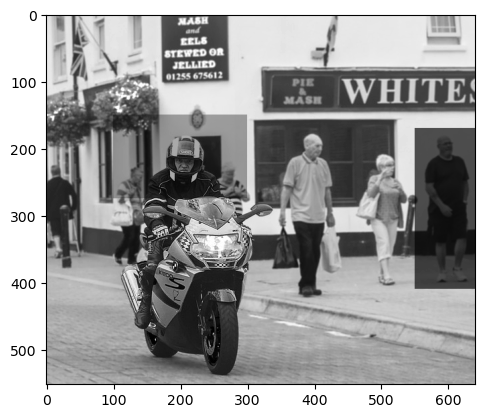

In [15]:
ave = (red + green + blue) / 3

plt.imshow(ave,cmap='gray')

We can also use `np.mean` to compute average:

In [16]:
np.mean(motorbike)

0.53239095

By default, `np.mean` will compute the average of **every** entry in the input array.

In [17]:
#help(np.mean)

We can optionally supply an `axis` argument to specify which which axes we want to compute averages through. In our case, we want to average the color information, which is `axis=2`. (dimension `0` is the rows, dimension `1` is the columns, dimension `2` is the colors).

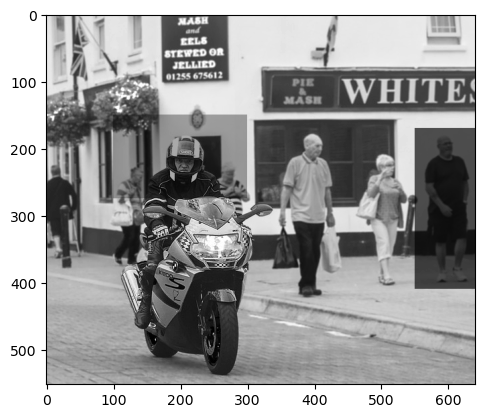

In [18]:
plt.imshow(np.mean(motorbike, axis=2),cmap='gray')

For the image processing project, make sure that we are working with grayscale images. If we get a color image after loading with `plt.imread()`, use `np.mean()` to convert back to grayscale.

## Salt and pepper noise

We would like to be able to randomly select some pixels of our image to convert to either black or white. The NumPy package has a module `random` that can be used to generate random information.

In particular, `np.random.rand` can be used to generate an array of random values:

In [19]:
#help(np.random.rand)

In [20]:
np.random.rand(10)

array([0.19999931, 0.49899461, 0.31303425, 0.41908576, 0.83705303,
       0.71455118, 0.27808939, 0.53371105, 0.80492984, 0.60455219])

In particular, `np.random.rand` selects values between 0 and 1 uniformly (meaning all such numbers are equally likely to appear).

In [21]:
np.random.rand(10,5)

array([[0.08199138, 0.42755018, 0.95007859, 0.0826717 , 0.23303695],
       [0.67983258, 0.14725387, 0.11088629, 0.78700912, 0.32313465],
       [0.8029529 , 0.17869752, 0.56057043, 0.98880264, 0.42650318],
       [0.87346097, 0.97807368, 0.26264487, 0.81107304, 0.59903231],
       [0.86226765, 0.516502  , 0.83672652, 0.43772818, 0.22995117],
       [0.76272627, 0.44469551, 0.47824177, 0.73063885, 0.75216814],
       [0.61225015, 0.76922196, 0.85760123, 0.88172962, 0.68109711],
       [0.48405579, 0.01148935, 0.43606037, 0.63901154, 0.05651904],
       [0.44460815, 0.47246607, 0.12409918, 0.1757114 , 0.98090743],
       [0.20551479, 0.59025962, 0.28128134, 0.70911631, 0.52183613]])

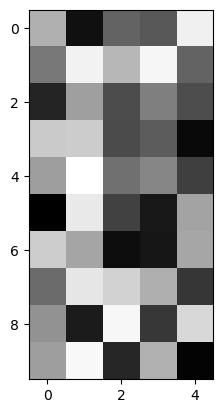

In [22]:
plt.imshow(np.random.rand(10,5),cmap='gray')

We can use random arrays to decide, for each pixel in our image array, should we add noise or not?
In particular, we check if a randomly generated value is sufficiently large.

In [23]:
gray_motorbike = np.mean(motorbike,axis=2)

In [24]:
nrows, ncols = gray_motorbike.shape

In [25]:
threshold = .9

In [26]:
noisy_motorbike = gray_motorbike.copy()

salt_array = np.random.rand(nrows,ncols)
pepper_array = np.random.rand(nrows,ncols)

for i in range(nrows):
    for j in range(ncols):
        if salt_array[i,j] > threshold:     # Check if random value exceed threshold
            noisy_motorbike[i,j] = 1           # If so, add salt noise
        if pepper_array[i,j] > threshold:
            noisy_motorbike[i,j] = 0

One problem with the above approach is that it favors pepper noise over salt noise. We can resolve this by using one random array and different threshold checks:

In [27]:
noisy_motorbike = gray_motorbike.copy()

saltpepper_array = np.random.rand(nrows,ncols)

for i in range(nrows):
    for j in range(ncols):
        if saltpepper_array[i,j] > threshold:     # Check if random value exceed threshold
            noisy_motorbike[i,j] = 1           # If so, add salt noise
        if saltpepper_array[i,j] < (1 - threshold):
            noisy_motorbike[i,j] = 0

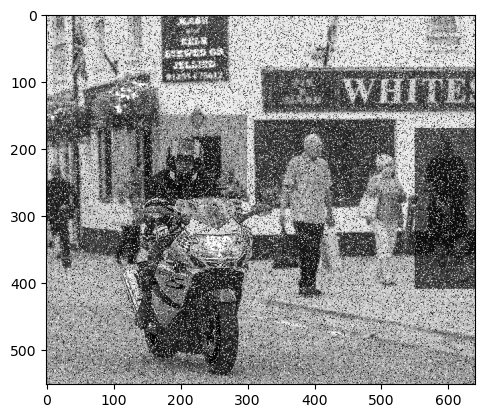

In [28]:
plt.imshow(noisy_motorbike,cmap='gray')

In the above code, we've used nested `for` loops to go pixel-by-pixel and check whether we want to apply salt or pepper noise.

**Exercise:** Rewrite our salt/pepper cell to use Boolean arrays/masks to apply the salt and pepper noise instead of `for` loops.